$$\textbf{Blatt 04 - Praktische Optimierung - Adrian Lentz, Robert Schönewald}$$

Lösungen und Erklärungen für Blatt 04. $$\newline$$
Adrian Lentz - Matrikelnummer: 258882 $$\newline$$
Robert Schönewald - Matrikelnummer: 188252

In [2]:
import numpy as np
import scipy 
from scipy.optimize import minimize
from kompasssuche import kompasssuche
import matplotlib.pyplot as plt

In [3]:
'Aufgabe 4.1'

def f(x,y):
    return x**2 + y**2 + 21* np.sin(x) * np.cos(y) + 2* np.absolute(x**2) + 2* np.absolute(y**2) + 0.25*y


#Gleiche Funktion, wird für Kompassuche genommen, da ich nicht weiß, wie der Input verändert werden muss, um x,y-Werte einzugeben
def f_2(x):
    return x[0]**2 + x[1]**2 + 21* np.sin(x[0]) * np.cos(x[1]) + 2* np.absolute(x[0]**2) + 2* np.absolute(x[1]**2) + 0.25*x[1]   


In [3]:
x_gitter= np.linspace(-10,10,num=51)
y_gitter= np.linspace(-10,10,num=51)
initial_points = [(x, y) for x in x_gitter for y in y_gitter]
#print(initial_points)   #Zum überprüfen, dass ein Gitter mit 2601 Punkten erstellt wurde


$\textbf{Vorgehensweise zur Bestimmung der Attratkionsgebiete}$\
Nachdem die verschiedenen Algorithmen ausgeführt wurden, wird jeweils ein Array aus den x,y und f(x,y) Werten erstellt. Dieses Ergebniss wird dann auf 2-Nachkommastellen gerundet, wobei auffällt, dass es nur eine endliche Anzahl an f(x,y)-Werten berechnet werden. Anschließend wird das Ergebniss sortiert und ein Plot erstellt, indem die x,y-Werte mit gleichen Funktionswert f(x,y) zusammengefasst werden. Diese sind unsere Attraktionsgebiete und werden dann graphisch geplottet, mit dem jeweiligen Optimum als schwarzen Marker. 


Attraktionsgebiete mittels Kompasssuche:
Aus Platz gründen nur die ersten 5-Ergebnisse
(array([-1.22, -0.01]), -15.26)
(array([-1.22, -0.01]), -15.26)
(array([-1.22, -0.01]), -15.26)
(array([-1.22, -0.01]), -15.26)
(array([-1.22, -0.01]), -15.26)

Anzahl Ergebnisse: 2601


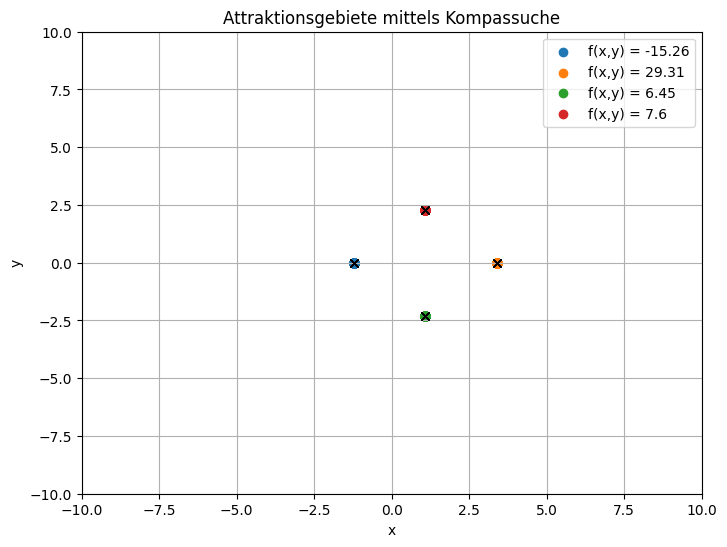

In [6]:
def kompass():
    attraktions_gebiet = []
    for x0 in initial_points:
            result= kompasssuche(f_2,x0)   #Ausgabe ist x-Wert und f(x)   --> Wahrscheinlich kann man das auch mit f(x,y) machen, aber ich weiß nicht wie ich dann den Input ändern muss, deswegen habe ich es mit f(x[0],x[1]) gemacht.
            #print(result['x'])  
            #print(result['fx'])
            rounded_result = (np.round(result['x'], decimals=2), np.round(result['fx'], decimals=2))
            attraktions_gebiet.append(rounded_result)  #Speichert x,f(x,y) ab
    return attraktions_gebiet

Ergbniss_Kompass=kompass()

#print("\nAttraktionsgebiete mittels Kompasssuche:")
#print(Ergbniss_Kompass)
#print(len(Ergbniss_Kompass)) #Muss 2601 ergeben



sorted_results = sorted(Ergbniss_Kompass, key=lambda x: (x[1], x[0][0], x[0][1]))   #Funktionswert als x[1] und Korrdinaten mit doppelten Index aufrufen

print("\nAttraktionsgebiete mittels Kompasssuche:")
print('Aus Platz gründen nur die ersten 5-Ergebnisse')
for result in sorted_results[:5]:   
    print(result)

print("\nAnzahl Ergebnisse:", len(sorted_results)) #Muss 2601 sein, damit richtig geklappt hat


# Funktionswerte
funktionswerte_kompass = list(set(result[1] for result in sorted_results))  #Liste alle f(x,y)-Werte

# Plot
plt.figure(figsize=(8, 6))
for value in funktionswerte_kompass:
    x_points = [result[0][0] for result in sorted_results if result[1] == value]  #Zuordnen aller x-Werte, mit gleichen f(x,y)-Wert
    y_points = [result[0][1] for result in sorted_results if result[1] == value]  #Zuordnen aller y-Werte, mit gleichen f(x,y)-Wert
    plt.scatter(x_points, y_points, label=f'f(x,y) = {value}')

#Optimum
for result in sorted_results:
    plt.plot(result[0][0], result[0][1], marker='x', color='black')                 #Optimum als Punkt für jeweiliges Attraktionsgebiet

plt.xlabel('x')
plt.ylabel('y')
plt.title('Attraktionsgebiete mittels Kompassuche')
plt.legend()
plt.grid(True)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

In [ ]:
'Um Attratktionsgebiete wirklich zu zeigen, muss jeder der 2601 gitterpunkte zu einem der 4 Optima zugeordnet werden, mittels np.unique und dann jeweils Gitterpunkt einfärben'
'Bei L-BFGS müssen noch Bounds auf (-10,10) gesetzt werden'

'def attraction_values_color(grid,res_x,res_fx):'
'x_opt = np.unique(res_x,axis=0,return_index=True)' #mit res_x ist gerundeter Wert über np.round
'fx_opt= np.take(res_fx,idx)'
'colors=np.zeros(len(res_fx))'
'for i, fx in enumarte(res_fx):'
'colors[i]=np.where(fx_opt==fx)[0]'
'return x_opt,fx_opt,colors'
'attraction_values_color(grid,res_x_kompass,res_fx_kompass)'


Attraktionsgebiete mittels BFGS:
Aus Platz gründen nur die ersten 5-Ergebnisse
(-1.22, -0.01, -15.26)
(-1.22, -0.01, -15.26)
(-1.22, -0.01, -15.26)
(-1.22, -0.01, -15.26)
(-1.22, -0.01, -15.26)

Anzahl Ergebnisse: 2601


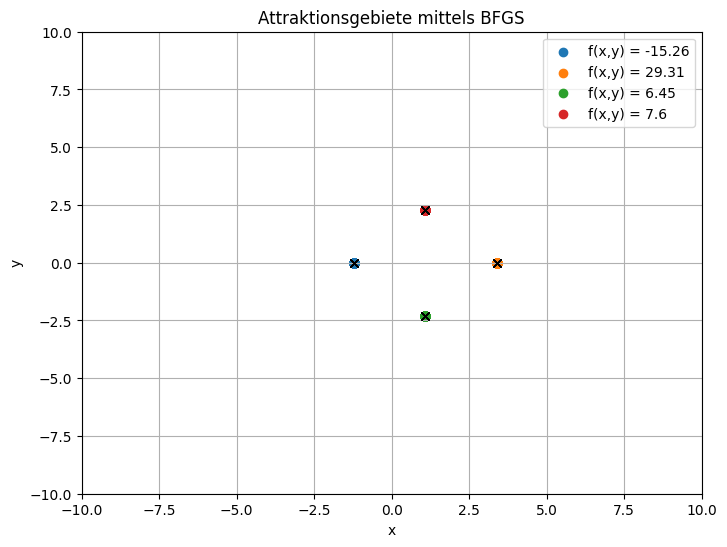

In [7]:
#Bestimmung der Attraktionsgebiete mittels BFGS-Algorithmus
def bfgs():
    attraktions_gebiet = []
    for x in x_gitter:
        for y in y_gitter:
            result = minimize(lambda point: f(point[0], point[1]), [x, y], method='BFGS')
            #print(result)
            rounded_result = (round(result.x[0], 2), round(result.x[1], 2), round(result.fun, 2))
            attraktions_gebiet.append(rounded_result)  #Speichert x,y,f(x,y) ab
    return attraktions_gebiet

Ergbniss_BFGS= bfgs()



#print("\nAttraktionsgebiete mittels BFGS:")
#print(Ergbniss_BFGS)

#Sortieren, um Attraktionsgebiete zu erstellen
sorted_results = sorted(Ergbniss_BFGS, key=lambda x: (x[2], x[0], x[1]))

print("\nAttraktionsgebiete mittels BFGS:")
print('Aus Platz gründen nur die ersten 5-Ergebnisse')
for result in sorted_results[:5]:
    print(result)

print("\nAnzahl Ergebnisse:", len(sorted_results)) #Muss 2601 sein, damit richtig geklappt hat


# Funktionswerte
funktionswerte_BFGS = list(set(result[2] for result in sorted_results))  #Liste alle f(x,y)-Werte

# Plot
plt.figure(figsize=(8, 6))
for value in funktionswerte_BFGS:
    x_points = [result[0] for result in sorted_results if result[2] == value]  #Zuordnen aller x-Werte, mit gleichen f(x,y)-Wert
    y_points = [result[1] for result in sorted_results if result[2] == value]  #Zuordnen aller y-Werte, mit gleichen f(x,y)-Wert
    plt.scatter(x_points, y_points, label=f'f(x,y) = {value}')

#Optimum
for result in sorted_results:
    plt.plot(result[0], result[1], marker='x', color='black')                 #Optimum als Punkt für jeweiliges Attraktionsgebiet

plt.xlabel('x')
plt.ylabel('y')
plt.title('Attraktionsgebiete mittels BFGS')
plt.legend()
plt.grid(True)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()


Attraktionsgebiete mittels L-BFGS-B:
Aus Platz gründen nur die ersten 5-Ergebnisse
(-1.22, -0.01, -15.26)
(-1.22, -0.01, -15.26)
(-1.22, -0.01, -15.26)
(-1.22, -0.01, -15.26)
(-1.22, -0.01, -15.26)

Anzahl Ergebnisse: 2601


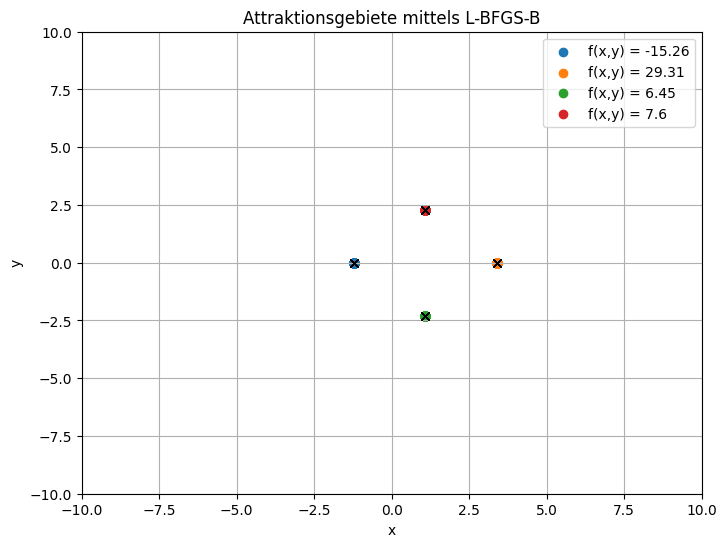

In [8]:
#Bestimmung der Attraktionsgebiete mittels L-BFGS-B-Algorithmus
def lbfgsb():
    attraktions_gebiet = []
    for x in x_gitter:
        for y in y_gitter:
            result = minimize(lambda point: f(point[0], point[1]), [x, y], method='L-BFGS-B')
            rounded_result = (round(result.x[0], 2), round(result.x[1], 2), round(result.fun, 2))
            attraktions_gebiet.append(rounded_result)  #Speichert x,y,f(x,y) ab
    return attraktions_gebiet


Ergbniss_L_BFGS_B=lbfgsb()

#print("\nAttraktionsgebiete mittels BFGS:")
#print(Ergbniss_L_BFGS_B)
#print(len(Ergbniss_L_BFGS_B)) #Muss 2601 ergeben



sorted_results = sorted(Ergbniss_L_BFGS_B, key=lambda x: (x[2], x[0], x[1]))

print("\nAttraktionsgebiete mittels L-BFGS-B:")
print('Aus Platz gründen nur die ersten 5-Ergebnisse')
for result in sorted_results[:5]:
    print(result)

print("\nAnzahl Ergebnisse:", len(sorted_results)) #Muss 2601 sein, damit richtig geklappt hat


# Funktionswerte
funktionswerte_L_BFGS_B = list(set(result[2] for result in sorted_results))  #Liste alle f(x,y)-Werte

# Plot
plt.figure(figsize=(8, 6))
for value in funktionswerte_L_BFGS_B:
    x_points = [result[0] for result in sorted_results if result[2] == value]  #Zuordnen aller x-Werte, mit gleichen f(x,y)-Wert
    y_points = [result[1] for result in sorted_results if result[2] == value]  #Zuordnen aller y-Werte, mit gleichen f(x,y)-Wert
    plt.scatter(x_points, y_points, label=f'f(x,y) = {value}')

#Optimum
for result in sorted_results:
    plt.plot(result[0], result[1], marker='x', color='black')                 #Optimum als Punkt für jeweiliges Attraktionsgebiet

plt.xlabel('x')
plt.ylabel('y')
plt.title('Attraktionsgebiete mittels L-BFGS-B')
plt.legend()
plt.grid(True)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

$\textbf{Unterschiede der Attraktionsgebiete}$:\
Für die unterschiedlichen Algorithmen ergeben sich gleiche Funktionswerte f(x,y), sodass auch die Graphen für die Attraktionsgebiete der verschiedenen Algorithmen gleich sind. Uns ist nicht klar, ob dies so gewollt ist, da der Output der verschieden Algorithmen sinnvoll erscheint. \
Ausgehenend von unseren Ergebnissen können wir keine Unterschiede in den Algorithmen sehen. \
\
\
Basierend darauf sind auch unsere Wahrscheinlichkeiten für alle Algorithmen gleich... --> Kein Algorithmus hat eine höhere Wahrscheinlichkeit für das jeweilige Optimum. 


In [7]:
'Wahrscheinlichkeiten für Kompass'

from collections import Counter  #Um Anzahl der Funktionswerte f(x,y) festzustellen
#Häufigkeit von f(x,y)
anzahl_f_kompass=Counter(funktionswerte_kompass)
Gesamt_Länge=len(Ergbniss_Kompass)

#Wahrscheinlichkeit
prob_kompass= {}
for opt, count in anzahl_f_kompass.items():
   prob_kompass[opt] = count/ Gesamt_Länge


for opt, prob in prob_kompass.items():
    print(f"Optimum {opt}: Wahrscheinlichkeit {prob:.8f}")


#Globales Optimum 
global_opt_kompass = min(prob_kompass.keys())
print(f'Globales Optimum mit Wahrscheinlichkeit {prob_kompass[global_opt_kompass]:.8f}')

Optimum -15.26: Wahrscheinlichkeit 0.00038447
Optimum 29.31: Wahrscheinlichkeit 0.00038447
Optimum 6.45: Wahrscheinlichkeit 0.00038447
Optimum 7.6: Wahrscheinlichkeit 0.00038447
Globales Optimum mit Wahrscheinlichkeit 0.00038447


In [8]:
'Wahrscheinlichkeiten für BFGS'
#Häufigkeit von f(x,y)
anzahl_f_BFGS=Counter(funktionswerte_BFGS)
Gesamt_Länge=len(Ergbniss_BFGS)

#Wahrscheinlichkeit
prob_BFGS= {}
for opt, count in anzahl_f_BFGS.items():
   prob_BFGS[opt] = count/ Gesamt_Länge


for opt, prob in prob_BFGS.items():
    print(f"Optimum {opt}: Wahrscheinlichkeit {prob:.8f}")


#Globales Optimum 
global_opt_kompass = min(prob_BFGS.keys())
print(f'Globales Optimum mit Wahrscheinlichkeit {prob_BFGS[global_opt_kompass]:.8f}')

Optimum -15.26: Wahrscheinlichkeit 0.00038447
Optimum 29.31: Wahrscheinlichkeit 0.00038447
Optimum 6.45: Wahrscheinlichkeit 0.00038447
Optimum 7.6: Wahrscheinlichkeit 0.00038447
Globales Optimum mit Wahrscheinlichkeit 0.00038447


In [9]:
'Wahrscheinlichkeiten für L-BFGS-B'

#Häufigkeit von f(x,y)
anzahl_f_L_BFGS_B=Counter(funktionswerte_L_BFGS_B)
Gesamt_Länge=len(Ergbniss_L_BFGS_B)

#Wahrscheinlichkeit
prob_L_BFGS_B= {}
for opt, count in anzahl_f_L_BFGS_B.items():
   prob_L_BFGS_B[opt] = count/ Gesamt_Länge


for opt, prob in prob_L_BFGS_B.items():
    print(f"Optimum {opt}: Wahrscheinlichkeit {prob:.8f}")


#Globales Optimum 
global_opt_kompass = min(prob_L_BFGS_B.keys())
print(f'Globales Optimum mit Wahrscheinlichkeit {prob_L_BFGS_B[global_opt_kompass]:.8f}')

Optimum -15.26: Wahrscheinlichkeit 0.00038447
Optimum 29.31: Wahrscheinlichkeit 0.00038447
Optimum 6.45: Wahrscheinlichkeit 0.00038447
Optimum 7.6: Wahrscheinlichkeit 0.00038447
Globales Optimum mit Wahrscheinlichkeit 0.00038447


$$\textbf{Aufgabe 4.2}$$

In [9]:
'Funktion definieren'

def f(x):
    return x[0]**2 + x[1]**2 + (21*np.sin(x[0])*np.cos(x[1])) + 2*(np.absolute(x[0])**2 + np.absolute(x[1])**2) + 0.25*x[1]

In [10]:
'Startpunkte erstellen'
start=np.stack((np.random.uniform(-10,10,100),np.random.uniform(-10,10,100)),axis=1)

In [11]:
def multistartbfgs(fun,startp):
    k=0
    x0=startp[0]
    f0=fun(x0)
    for x in startp:
        x1=scipy.optimize.minimize(fun,x,method='BFGS').x
        if fun(x1)<f0:
            x0=x1
            f0=fun(x1)
    return (x0,f0)

In [12]:
def multistartlbfgsb(fun,startp):
    k=0
    x0=startp[0]
    f0=fun(x0)
    for x in startp:
        x1=scipy.optimize.minimize(fun,x,method='L-BFGS-B').x
        if fun(x1)<f0:
            x0=x1
            f0=fun(x1)
    return (x0,f0)

In [13]:
def multistartkompass(fun,startp):
    k=0
    x0=startp[0]
    f0=fun(x0)
    for x in startp:
        x1=kompasssuche(fun,x)['x']
        f1=kompasssuche(fun,x)['fx']
        if f1<f0:
            x0=x1
            f0=f1
    return (x0,f0)

In [14]:
print('BFGS:')
print('x*: ',end=' ')      
print(round(multistartbfgs(f,start)[0][0],2), end=' ')
print(round(multistartbfgs(f,start)[0][1],2), end=' ')
print('f(x*): ',end=' ')      
print(round(multistartbfgs(f,start)[1],2))
print('L-BFGS-B:')
print('x*: ',end=' ')      
print(round(multistartlbfgsb(f,start)[0][0],2), end=' ')
print(round(multistartlbfgsb(f,start)[0][1],2), end=' ')
print('f(x*): ',end=' ')      
print(round(multistartlbfgsb(f,start)[1],2))
print('Kompasssuche:')
print('x*: ',end=' ')      
print(round(multistartkompass(f,start)[0][0],2), end=' ')
print(round(multistartkompass(f,start)[0][1],2), end=' ')
print('f(x*): ',end=' ')      
print(round(multistartkompass(f,start)[1],2))

BFGS:
x*:  -1.22 -0.01 f(x*):  -15.26
L-BFGS-B:
x*:  -1.22 -0.01 f(x*):  -15.26
Kompasssuche:
x*:  -1.22 -0.01 f(x*):  -15.26


Es scheint mit der Multistartsuche finden alle Algorithmen das gleiche Optimum. Dieses ist nach Aufgabe 1 auch das globale Optimum.